# Backpropagation algorithm

## Importing Libraries

In [81]:
import numpy as np # array operations
import pandas as pd # hangling data
from sklearn.datasets import load_iris # plant Iris dataset
from sklearn.model_selection import train_test_split # splitting dataset into train & test
import matplotlib.pyplot as plt # plotting graph

## Load dataset

In [82]:
dataset = load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

## Segregating Data into X(input) & Y(output)

In [83]:
x=dataset.data
y=dataset.target
#print(x)
#print(y)

## Convert categorical variable into dummy/indicator variables

In [84]:
y = pd.get_dummies(y).values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

## Split dataset into Train & Test

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=20, random_state=4)

## Initializing Hyper Parameters

In [86]:
learningRate = 0.1
epoch = 5000
N = y_train.size
input_size = 4
hidden_size = 2
output_size = 3
results = pd.DataFrame(columns=["MeanSquareError", "accuracy"])

## Initializing Weights

In [87]:
np.random.seed(10)
firstWeight = np.random.normal(scale=0.5, size=(input_size, hidden_size))
lastWeight = np.random.normal(scale=0.5, size=(hidden_size, output_size))
print(firstWeight)
print(lastWeight)

[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]
[[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


## Activation function

In [88]:
def activationFn(x):
  return 1 / (1 + np.exp(-x))

## Mean Squared Error

In [89]:
def mse(y_pred,y_true):
  return ((y_pred - y_true)**2).sum()/ (2*y_pred.size)

## Evaluation Function - Accuracy

In [90]:
def accuracy(y_pred, y_true):
  acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
  return acc.mean()

## Training

In [91]:
for i in range(epoch):
  # feedforward propagation on hidden layer
  firstNetInput = np.dot(X_train, firstWeight)
  firstAFnOp = activationFn(firstNetInput)

  # feedforward propagation on output layer
  lastNetInput = np.dot(firstAFnOp, lastWeight)
  lastAFnOp = activationFn(lastNetInput)

  # Calculating error
  mseValue = mse(lastAFnOp, y_train)
  acc = accuracy(lastAFnOp, y_train)
  results = results.append({"MeanSquareError":mseValue, "accuracy":acc},ignore_index=True)

  # backpropagation
  E1 = lastAFnOp - y_train
  dfirstWeight = E1 * lastAFnOp * (1 - lastAFnOp)

  E2 = np.dot(dfirstWeight, lastWeight.T)
  dlastWeight = E2 * firstAFnOp * (1 - firstAFnOp)

  # weight updates
  lastWeight_update = np.dot(firstAFnOp.T, dfirstWeight) / N
  firstWeight_update = np.dot(X_train.T, dlastWeight) / N

  lastWeight = lastWeight - learningRate * lastWeight_update
  firstWeight = firstWeight - learningRate * firstWeight_update

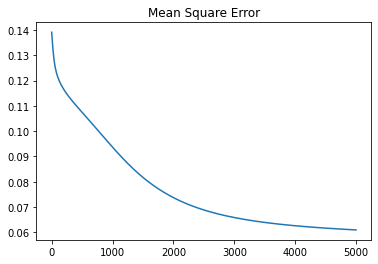

In [92]:
results.MeanSquareError.plot(title="Mean Square Error")

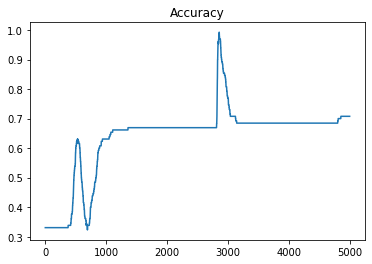

In [93]:
results.accuracy.plot(title="Accuracy")

In [94]:
# feedforward
firstNetInput = np.dot(X_test, firstWeight)
firstAFnOp = activationFn(firstNetInput)

lastNetInput = np.dot(firstAFnOp, lastWeight)
lastAFnOp = activationFn(lastNetInput)

acc = accuracy(lastAFnOp, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8
